# Network typologies from _Leavitt 1949_

* Networks from _Some Effects of Certain Communication Patterns Upon Group Performance [(Leavitt 1949)](../29382598-MIT.pdf)_
* Leavitt used four network patterns
  1. chain
  2. circle
  3. wheel
  4. Y
* Each network has 5 nodes and the edges represent possible bidirectional paths of communication between them
* In all networks **apart from the Circle** the `C` node is the most central.

In [32]:
import networkx as nx
from dataclasses import dataclass, field
from typing import Dict, List, Set, Tuple, Optional
import matplotlib.pyplot as plt

In [47]:
NETWORKS: Dict[str, Dict[str, List[str]]] = {
    "chain": {
        "A": ["B"],
        "B": ["A", "C"],
        "C": ["B", "D"],
        "D": ["C", "E"],
        "E": ["D"],
    },
    "circle": {
        "A": ["B", "E"],
        "B": ["A", "C"],
        "C": ["B", "D"],
        "D": ["C", "E"],
        "E": ["D", "A"],
    },
    "wheel": {  
        "A": ["C"],
        "B": ["C"],
        "C": ["A", "B", "D", "E"],
        "D": ["C"],
        "E": ["C"],
    },
    "Y": {  
        "A": ["C"],
        "B": ["C"],
        "C": ["A", "B", "D"],
        "D": ["C", "E"],
        "E": ["D"],
    },
}

In [36]:
GRAPHS = { 
    name: nx.from_dict_of_lists(network_def)
    for name, network_def in NETWORKS.items()
}

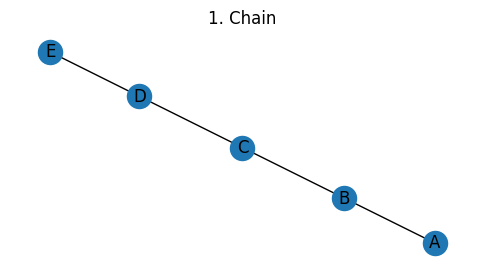

Node: A  0.0
Node: B  0.5
Node: C  0.7
Node: D  0.5
Node: E  0.0


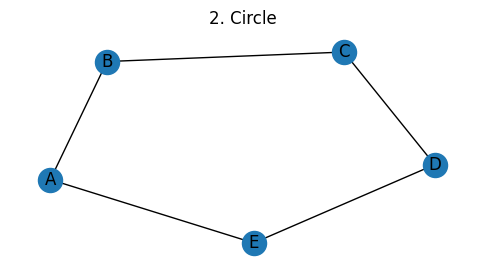

Node: A  0.2
Node: B  0.2
Node: C  0.2
Node: D  0.2
Node: E  0.2


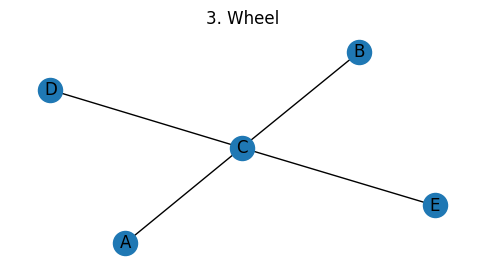

Node: A  0.0
Node: B  0.0
Node: C  1.0
Node: D  0.0
Node: E  0.0


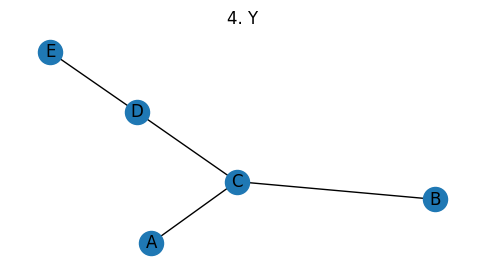

Node: A  0.0
Node: B  0.0
Node: C  0.8
Node: D  0.5
Node: E  0.0


In [46]:
for num, network in enumerate(NETWORKS,1):
    net = GRAPHS[network]
    plt.figure(figsize=(6,3))
    nx.draw_networkx(net)
    plt.title(f"{num}. {network.title()}")
    plt.axis("off")
    plt.show()

    for node, centrality in nx.centrality.betweenness_centrality(net).items():
        print(f'Node: {node}  {centrality:0.1f}')